In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now() # todays date

ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day) # 10 years before (2014, jan, 16)
end = now
df = yf.download(ticker, start, end)
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-30,26.090866,26.723317,26.021830,26.367007,334982000
2015-02-02,26.418221,26.538476,25.850351,26.289059,250956400
2015-02-03,26.422680,26.520664,26.191078,26.389275,207662800
2015-02-04,26.625332,26.836892,26.346964,26.389276,280598800
2015-02-05,26.815372,26.880209,26.661106,26.833257,168984800
...,...,...,...,...,...
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400


# 2. Data Exploration & Visualization

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2516, 5)

In [5]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,95.869766,96.801222,94.832591,95.780526,1.155616e+08
std,66.568531,67.176590,65.865149,66.489809,6.702711e+07
min,20.697262,21.001978,20.497942,20.619375,5.438606e+06
25%,35.929424,36.113794,35.694375,35.918672,7.040315e+07
50%,67.605751,68.322748,66.955173,67.367663,9.895455e+07
75%,152.466553,154.332026,150.422243,152.278920,1.408220e+08
max,259.019989,260.100006,257.630005,258.190002,6.488252e+08


In [6]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [7]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

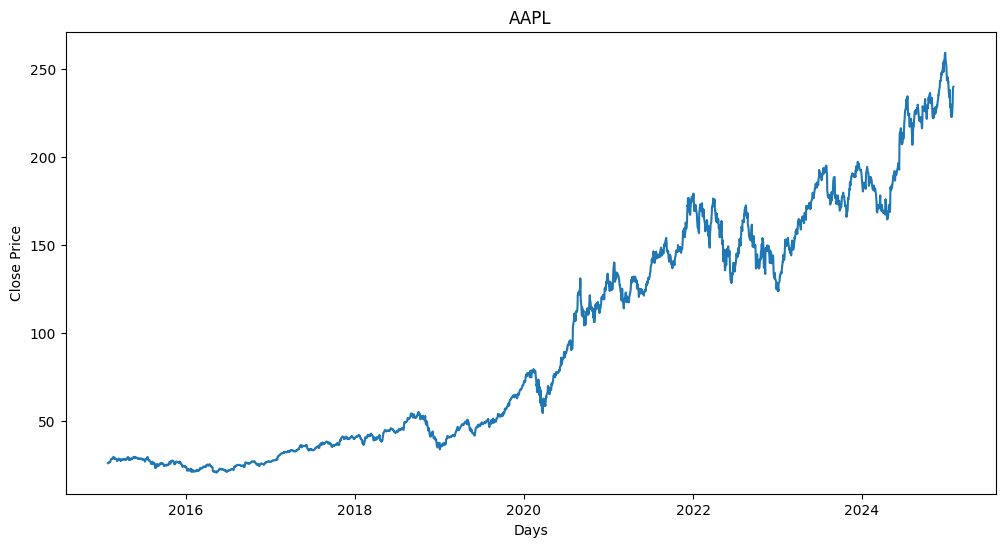

In [8]:
plt.figure(figsize=(12,6));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');


# 3. Feature Engineering

In [9]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90

# MA of 5 days ==> null, null, null, null, 30, 40

In [10]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[:5])/5)

30.0


In [11]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [12]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days moving avarage

In [13]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)





Price,Close,High,Low,Open,Volume,MA_100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2015-01-30,26.090866,26.723317,26.021830,26.367007,334982000,NaN
2015-02-02,26.418221,26.538476,25.850351,26.289059,250956400,NaN
2015-02-03,26.422680,26.520664,26.191078,26.389275,207662800,NaN
2015-02-04,26.625332,26.836892,26.346964,26.389276,280598800,NaN
2015-02-05,26.815372,26.880209,26.661106,26.833257,168984800,NaN
...,...,...,...,...,...,...
2015-06-22,28.649347,28.750375,28.530359,28.622406,136157200,NaN
2015-06-23,28.519136,28.649351,28.485460,28.620166,121075600,28.428192


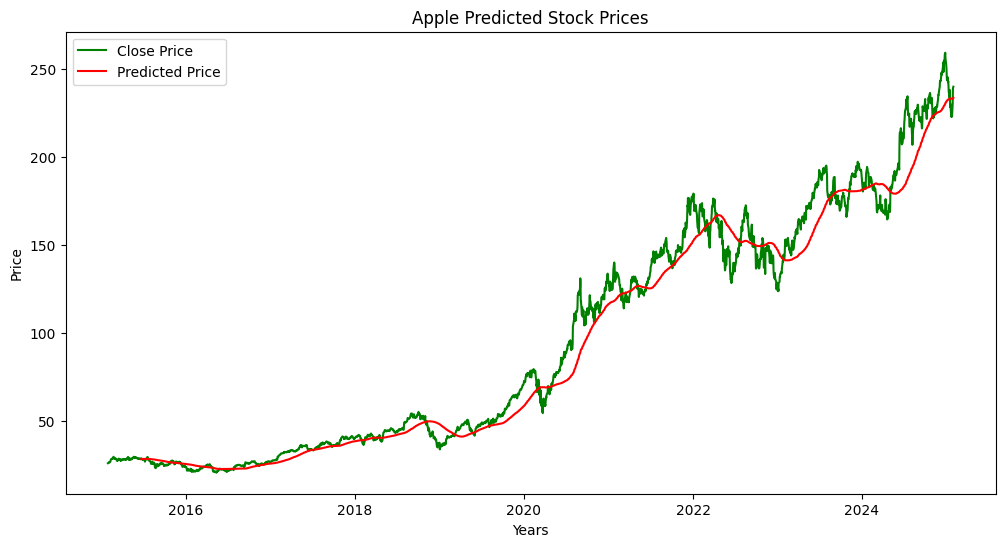

In [14]:
plt.figure(figsize=(12,6));
plt.plot(df.Close, 'g', label='Close Price');
plt.plot(df.MA_100, 'r', label='Predicted Price');
plt.legend();
plt.title('Apple Predicted Stock Prices');
plt.xlabel('Years');
plt.ylabel('Price');

### 200 days moving avarage

In [15]:
df['MA_200'] = df.Close.rolling(200).mean()

In [16]:
df

Price,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2015-01-30,26.090866,26.723317,26.021830,26.367007,334982000,NaN,NaN
2015-02-02,26.418221,26.538476,25.850351,26.289059,250956400,NaN,NaN
2015-02-03,26.422680,26.520664,26.191078,26.389275,207662800,NaN,NaN
2015-02-04,26.625332,26.836892,26.346964,26.389276,280598800,NaN,NaN
2015-02-05,26.815372,26.880209,26.661106,26.833257,168984800,NaN,NaN
...,...,...,...,...,...,...,...
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900,232.858958,217.798979
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400,232.870074,218.102988


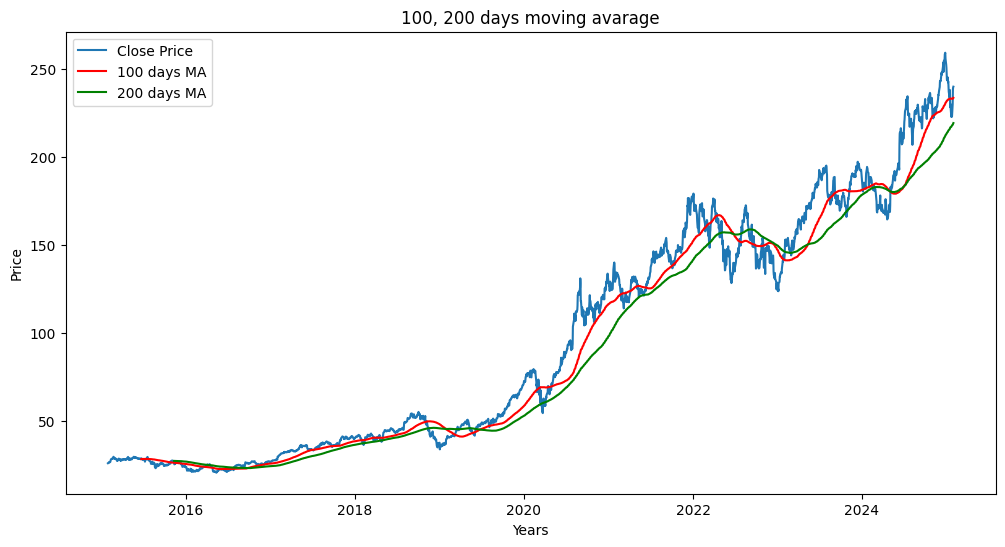

In [17]:
plt.figure(figsize=(12,6));
plt.plot(df.Close, label='Close Price');
plt.plot(df.MA_100, 'r', label='100 days MA');
plt.plot(df.MA_200, 'g', label='200 days MA');
plt.legend();
plt.title('100, 200 days moving avarage');
plt.xlabel('Years');
plt.ylabel('Price');

### Calculating percentage change between each treading session

In [18]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
Date,,
2015-01-30,26.090866,NaN
2015-02-02,26.418221,0.012547
2015-02-03,26.422680,0.000169
2015-02-04,26.625332,0.007670
2015-02-05,26.815372,0.007138
...,...,...
2025-01-24,222.779999,-0.003935
2025-01-27,229.860001,0.031780


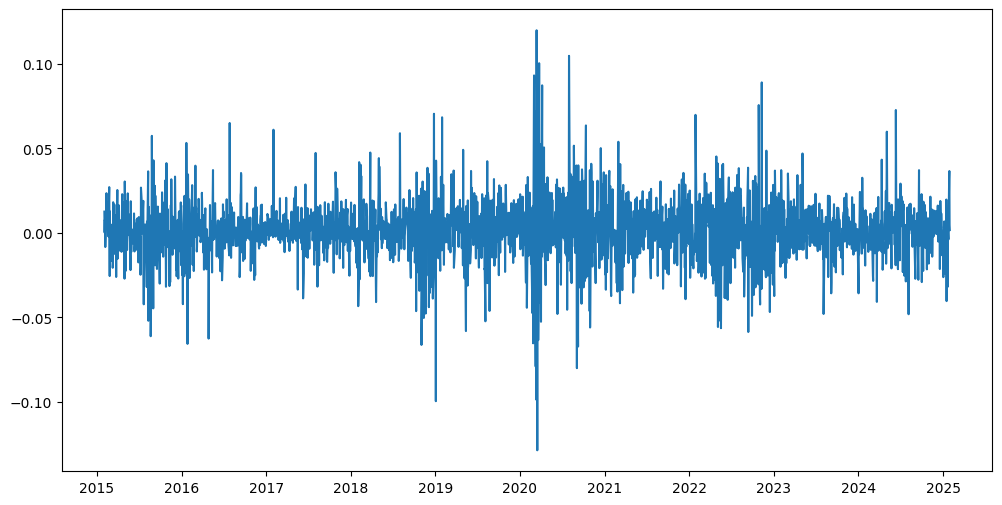

In [19]:
plt.figure(figsize=(12,6));
plt.plot(df['Percentage Changed']);

### 4. Data Preprocessing

In [20]:
df.shape

(2516, 8)

In [21]:
df

Price,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2015-01-30,26.090866,26.723317,26.021830,26.367007,334982000,NaN,NaN,NaN
2015-02-02,26.418221,26.538476,25.850351,26.289059,250956400,NaN,NaN,0.012547
2015-02-03,26.422680,26.520664,26.191078,26.389275,207662800,NaN,NaN,0.000169
2015-02-04,26.625332,26.836892,26.346964,26.389276,280598800,NaN,NaN,0.007670
2015-02-05,26.815372,26.880209,26.661106,26.833257,168984800,NaN,NaN,0.007138
...,...,...,...,...,...,...,...,...
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900,232.858958,217.798979,-0.003935
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400,232.870074,218.102988,0.031780


In [22]:
# Spliting data into training and testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

Ticker            AAPL
Date                  
2015-01-30   26.090866
2015-02-02   26.418221
2015-02-03   26.422680
2015-02-04   26.625332
2015-02-05   26.815372
...                ...
2022-01-20  161.858612
2022-01-21  159.792496
2022-01-24  159.015228
2022-01-25  157.204849
2022-01-26  157.116287

[1761 rows x 1 columns]
Ticker            AAPL
Date                  
2022-01-27  156.653900
2022-01-28  167.584808
2022-01-31  171.963120
2022-02-01  171.795868
2022-02-02  173.006027
...                ...
2025-01-24  222.779999
2025-01-27  229.860001
2025-01-28  238.259995
2025-01-29  239.360001
2025-01-30  239.750000

[755 rows x 1 columns]


In [23]:
data_training

Ticker,AAPL
Date,
2015-01-30,26.090866
2015-02-02,26.418221
2015-02-03,26.422680
2015-02-04,26.625332
2015-02-05,26.815372
...,...
2022-01-20,161.858612
2022-01-21,159.792496
2022-01-24,159.015228


In [24]:
data_testing

Ticker,AAPL
Date,
2022-01-27,156.653900
2022-01-28,167.584808
2022-01-31,171.963120
2022-02-01,171.795868
2022-02-02,173.006027
...,...
2025-01-24,222.779999
2025-01-27,229.860001
2025-01-28,238.259995


In [25]:
# Scaling down data between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.03405498],
       [0.03612188],
       [0.03615004],
       ...,
       [0.87333349],
       [0.86190284],
       [0.86134366]])

In [27]:
type(data_training_array)

numpy.ndarray

In [28]:
data_training_array.shape

(1761, 1)

### 5. Sequence Creation

In [29]:
# 10, 20, 15, 16, 20, 10, 30       25

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train

array([[[0.03405498],
        [0.03612188],
        [0.03615004],
        ...,
        [0.04877744],
        [0.05020911],
        [0.04938697]],

       [[0.03612188],
        [0.03615004],
        [0.03742957],
        ...,
        [0.05020911],
        [0.04938697],
        [0.05091791]],

       [[0.03615004],
        [0.03742957],
        [0.03862948],
        ...,
        [0.04938697],
        [0.05091791],
        [0.05005323]],

       ...,

       [[0.81114138],
        [0.81535948],
        [0.82243118],
        ...,
        [0.90197145],
        [0.89128649],
        [0.87824112]],

       [[0.81535948],
        [0.82243118],
        [0.82646334],
        ...,
        [0.89128649],
        [0.87824112],
        [0.87333349]],

       [[0.82243118],
        [0.82646334],
        [0.84128865],
        ...,
        [0.87824112],
        [0.87333349],
        [0.86190284]]])

In [32]:
y_train

array([0.05091791, 0.05005323, 0.04899005, ..., 0.87333349, 0.86190284,
       0.86134366])

In [33]:
x_train.ndim

3

In [34]:
y_train.ndim

1

In [35]:
x_train.shape

(1661, 100, 1)

In [36]:
y_train.shape

(1661,)

### 6. Model Building

In [37]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [39]:
# ML model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [40]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### 7. Model Training

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - loss: 0.0270
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 4.8493e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 4.8565e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 3.5329e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 3.7812e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 3.7718e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 3.0426e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 4.0312e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 3.4798e-04 
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 2.7123e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.7340e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 3.1350e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 2.3266e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 2.4001e-04
E

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
# save the trained model
model.save('stock_prediction_model.keras')

### 8. Preparing test data

In [45]:
data_testing

Ticker,AAPL
Date,
2022-01-27,156.653900
2022-01-28,167.584808
2022-01-31,171.963120
2022-02-01,171.795868
2022-02-02,173.006027
...,...
2025-01-24,222.779999
2025-01-27,229.860001
2025-01-28,238.259995


In [47]:
past_100_days = data_training.tail(100)

In [48]:
past_100_days

Ticker,AAPL
Date,
2021-09-03,151.591965
2021-09-07,153.939987
2021-09-08,152.387711
2021-09-09,151.365982
2021-09-10,146.355484
...,...
2022-01-20,161.858612
2022-01-21,159.792496
2022-01-24,159.015228


In [49]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,151.591965
1,153.939987
2,152.387711
3,151.365982
4,146.355484
...,...
850,222.779999
851,229.860001
852,238.259995
853,239.360001


In [50]:
input_data = scaler.fit_transform(final_df)

In [58]:
input_data


array([[2.06007182e-01],
       [2.23361247e-01],
       [2.11888482e-01],
       [2.04336960e-01],
       [1.67304729e-01],
       [1.71516146e-01],
       [1.61132690e-01],
       [1.67740385e-01],
       [1.65997648e-01],
       [1.46174564e-01],
       [1.23519772e-01],
       [1.27077648e-01],
       [1.44649937e-01],
       [1.51765464e-01],
       [1.52419230e-01],
       [1.41164463e-01],
       [1.16040765e-01],
       [1.22720975e-01],
       [1.13063688e-01],
       [1.21413894e-01],
       [9.59271684e-02],
       [1.10231529e-01],
       [1.16694080e-01],
       [1.26061193e-01],
       [1.23229146e-01],
       [1.22575606e-01],
       [1.13136090e-01],
       [1.08779304e-01],
       [1.29473926e-01],
       [1.37315848e-01],
       [1.49732440e-01],
       [1.65780102e-01],
       [1.69410381e-01],
       [1.71008087e-01],
       [1.65271705e-01],
       [1.64908677e-01],
       [1.69846375e-01],
       [1.66433529e-01],
       [1.93445220e-01],
       [1.73331624e-01],


In [52]:
input_data.shape

(855, 1)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [59]:
x_test[0].shape

(100, 1)

### 9. Making Prediction

In [60]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step


In [61]:
y_predicted

array([[0.24965912],
       [0.24555624],
       [0.2779686 ],
       [0.31972688],
       [0.3454203 ],
       [0.36018655],
       [0.3554866 ],
       [0.3475752 ],
       [0.33981088],
       [0.3461668 ],
       [0.35754526],
       [0.35106105],
       [0.33278182],
       [0.3212833 ],
       [0.32905027],
       [0.33662167],
       [0.32894412],
       [0.31658328],
       [0.29899237],
       [0.27460688],
       [0.2675904 ],
       [0.27367103],
       [0.28109643],
       [0.27984425],
       [0.28783074],
       [0.29314673],
       [0.28588584],
       [0.26695624],
       [0.24781707],
       [0.25321725],
       [0.24827181],
       [0.2321593 ],
       [0.20828302],
       [0.20515244],
       [0.22112818],
       [0.23864889],
       [0.25998616],
       [0.27778518],
       [0.29806063],
       [0.31444454],
       [0.33528164],
       [0.34977552],
       [0.35925898],
       [0.37469932],
       [0.38000673],
       [0.37007186],
       [0.36084458],
       [0.370

In [62]:
y_test

array([2.43419583e-01, 3.24209141e-01, 3.56568925e-01, 3.55332780e-01,
       3.64276981e-01, 3.42897692e-01, 3.40786514e-01, 3.35471352e-01,
       3.58552327e-01, 3.69110023e-01, 3.38820254e-01, 3.13482281e-01,
       3.15229867e-01, 3.43698745e-01, 3.41951609e-01, 3.15229867e-01,
       3.03725638e-01, 2.82028093e-01, 2.51083544e-01, 2.70524089e-01,
       2.85887084e-01, 2.87853006e-01, 2.73873216e-01, 2.98337735e-01,
       2.95934803e-01, 2.73654881e-01, 2.45477080e-01, 2.31934526e-01,
       2.72052889e-01, 2.39797988e-01, 2.12202452e-01, 1.82277403e-01,
       2.14823945e-01, 2.47588596e-01, 2.55088241e-01, 2.79552647e-01,
       2.89745848e-01, 3.14792971e-01, 3.24913770e-01, 3.53018830e-01,
       3.57751388e-01, 3.64158791e-01, 3.88623197e-01, 3.79958908e-01,
       3.56950448e-01, 3.54766078e-01, 3.84836947e-01, 3.60226947e-01,
       3.36708850e-01, 3.38966412e-01, 3.24039864e-01, 2.92440194e-01,
       3.06346904e-01, 3.26297088e-01, 2.89090729e-01, 2.87489188e-01,
      

In [63]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [64]:
y_predicted

array([157.49811 , 156.943   , 161.32841 , 166.97835 , 170.4547  ,
       172.45258 , 171.81668 , 170.74626 , 169.69574 , 170.5557  ,
       172.09523 , 171.2179  , 168.7447  , 167.18893 , 168.2398  ,
       169.26424 , 168.22546 , 166.55302 , 164.17294 , 160.87357 ,
       159.92424 , 160.74696 , 161.7516  , 161.58218 , 162.66278 ,
       163.38203 , 162.39963 , 159.83844 , 157.24889 , 157.97954 ,
       157.31042 , 155.13037 , 151.89989 , 151.47632 , 153.63785 ,
       156.00842 , 158.89539 , 161.3036  , 164.04688 , 166.26366 ,
       169.08293 , 171.04396 , 172.32709 , 174.41617 , 175.13428 ,
       173.79007 , 172.54161 , 173.79266 , 173.3997  , 171.44612 ,
       170.24481 , 168.80255 , 166.05948 , 165.13268 , 166.16655 ,
       164.92896 , 163.70581 , 163.99036 , 164.37476 , 164.26826 ,
       162.11424 , 160.91954 , 157.87234 , 155.64578 , 157.38771 ,
       156.8526  , 156.22285 , 156.43611 , 159.44888 , 158.0091  ,
       156.52765 , 153.50208 , 152.3303  , 148.91533 , 144.912

In [65]:
y_test

array([156.65390015, 167.58480835, 171.96311951, 171.79586792,
       173.00602722, 170.11338806, 169.82774353, 169.1085968 ,
       172.23147583, 173.65994263, 169.56170654, 166.13345337,
       166.36990356, 170.22177124, 169.98538208, 166.36990356,
       164.81336975, 161.87767029, 157.69084167, 160.32116699,
       162.39979553, 162.66578674, 160.77430725, 164.0843811 ,
       163.75926208, 160.74476624, 156.93228149, 155.09996033,
       160.52801514, 156.16389465, 152.43019104, 148.38130188,
       152.78488159, 157.2179718 , 158.23268127, 161.54273987,
       162.92189026, 166.31079102, 167.68014526, 171.48278809,
       172.12310791, 172.99003601, 176.3000946 , 175.12780762,
       172.01473999, 171.7191925 , 175.78781128, 172.45805359,
       169.27603149, 169.58148193, 167.56190491, 163.28643799,
       165.16802979, 167.86730957, 162.83325195, 162.61656189,
       164.91186523, 164.74443054, 163.94648743, 159.38526917,
       160.45910645, 154.46946716, 154.2428894 , 161.20

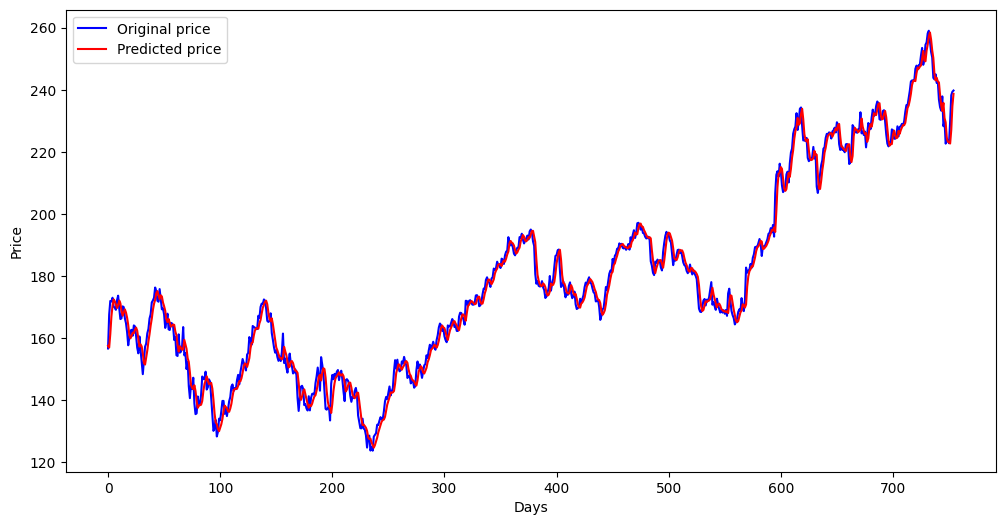

In [70]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original price');
plt.plot(y_predicted, 'r', label='Predicted price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();


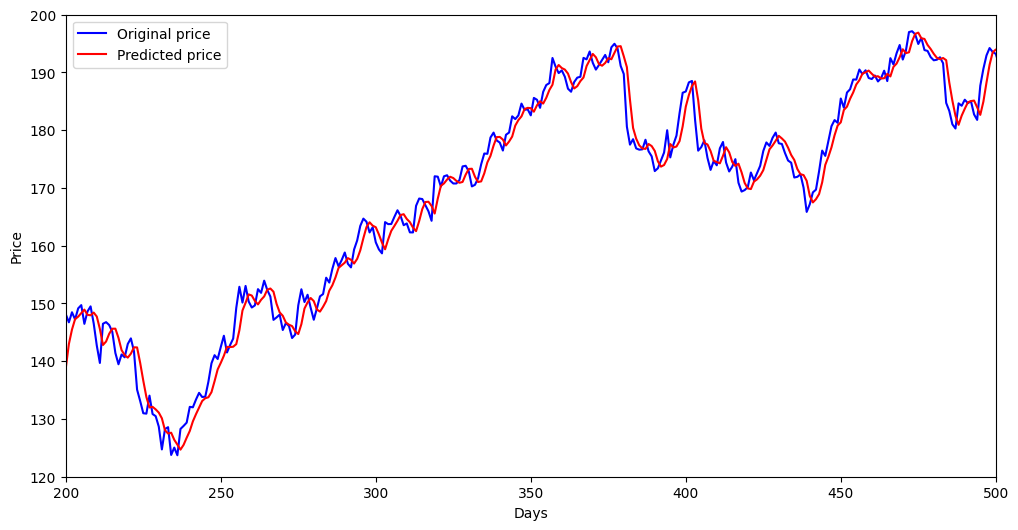

In [71]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original price');
plt.plot(y_predicted, 'r', label='Predicted price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(200, 500);
plt.ylim(120, 200);

### 10. Model Evalution

In [76]:
#  Mean squared error
from sklearn.metrics import mean_squared_error, r2_score


In [73]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 11.184255392840116


In [74]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.344286978242166


In [77]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print(f'R2-Squared: {r2}')

R2-Squared: 0.9882814297180127
